## Soal 2 - Exploratory Data Analysis (EDA)

Dataset - BANK

Customer churn is the term used in the banking sector tries to denote the movement of customers from one bank to another. In the banking industry, identifying probable churn customers has increased in its importance in the recent past. In banking domain, we define a churn customer as one who closes all his/her accounts and stops doing business with the bank. There are many reasons for a customer to close the account(s).

### Problem

- Number of customers leaving the bank among three countries in Europe (France, Germany and Spain)

### Goals

- Focus on targeting which customer is more likely to stay or leave the bank

### Dataset
- analyze a recent and large dataset from 10000 customers across France, Germany and Spain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
# Read file
data = pd.read_csv('bank.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.shape

(10000, 14)

In [5]:
# Melihat data null / missing value

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Describe data dengan tipe data Object

data.describe(include = 'O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
# Describe data

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Categorical and Numerical Variables

In [8]:
num_var = data._get_numeric_data().columns
cat_var= list(set(data.columns) - set(num_var))
print(num_var)
print(cat_var)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
['Gender', 'Surname', 'Geography']


##  Univariate Analysis

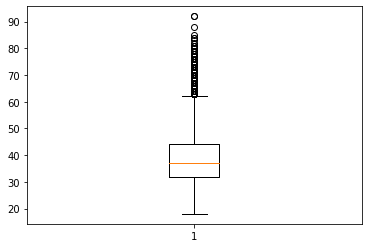

In [9]:
plt.boxplot(data['Age'])
plt.show()

In [10]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

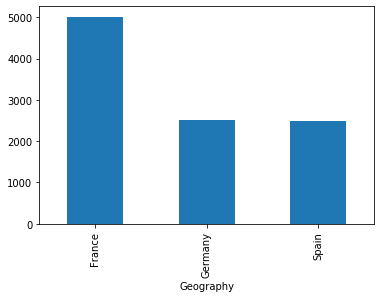

In [12]:
data.groupby('Geography').size().plot(kind='bar')

## Analysis :
- The majority of clients come from France among three countries.

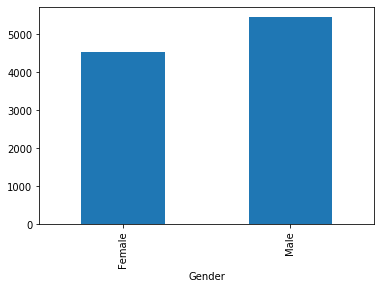

In [13]:
data.groupby('Gender').size().plot(kind='bar')

## Analysis :
- The majority of clients are Male.

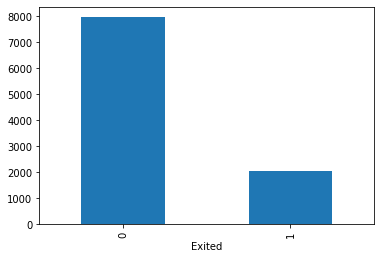

In [14]:
# Analisa Univariate variabel exited dimana 1 = yes (keluar/ pindah bank), 0 = no (tidak pindah bank)
data.groupby('Exited').size().plot(kind='bar')

## Multivariate ( 2 Variables )

## Gender => Exited

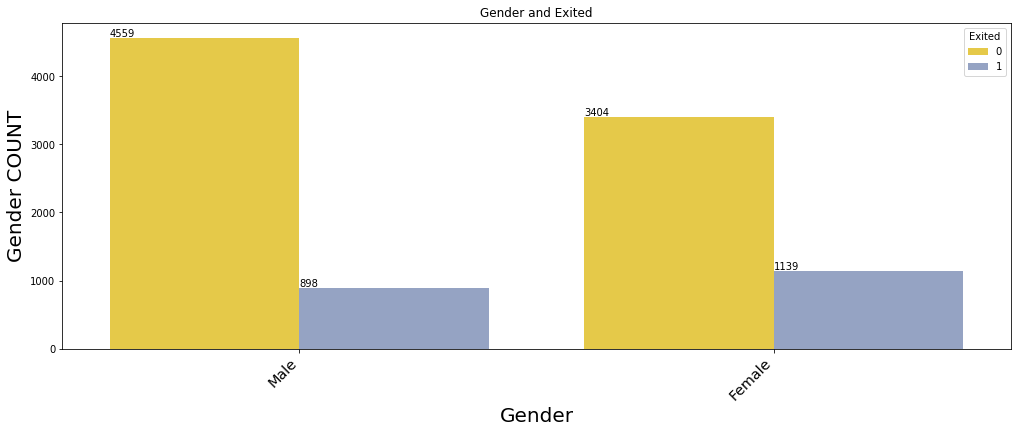

In [15]:
# Variabel exited dimana 1 = yes (keluar/ pindah bank), 0 = no (tidak pindah bank)
plt.figure(figsize = (17, 6))
a= sns.countplot('Gender', hue = 'Exited', data = data ,palette= 'Set2_r',order = data['Gender'].value_counts().index)
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Gender and Exited')
plt.xlabel('Gender',fontsize = 20)
plt.ylabel('Gender COUNT',fontsize = 20)
plt.show()

## Analysis :
    - Gender of customers who most likely leaving bank for another banks is Female
    - Buckinx and Van den Poel (2005) investigated the effect of gender as a customer demographic variable.
    Clemes et al. (2010) listed customer-related demographic variables (e.g., income, age, education, culture, and nationality). They further suggested that the customer’s occupation may affect his or her use of electronic banking channels
    
-- Source :
Keramati, A., Ghaneei, H. & Mirmohammadi, S.M. Developing a prediction model for customer churn from electronic banking services using data mining. Financ Innov 2, 10 (2016). 

## Geography => Exited

In [16]:
pd.crosstab(index = data['Geography'], columns = data['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


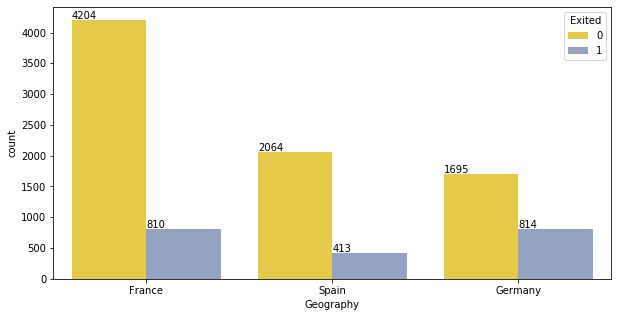

In [17]:
plt.figure(figsize=(10,5))
a= sns.countplot('Geography',hue='Exited',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

## Analysis :

- Customer who most likely move to other banks is Germany. And the least is Spain
- Clemes et al. (2010) who listed customer-related demographic variables (e.g., income, age, education, culture, and nationality).
    
-- Source :
Keramati, A., Ghaneei, H. & Mirmohammadi, S.M. Developing a prediction model for customer churn from electronic banking services using data mining. Financ Innov 2, 10 (2016). 

## Age => Exited

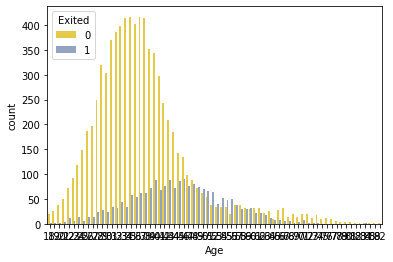

In [18]:
# variabel exited dimana :
# 1 = yes (keluar/ pindah bank), 0 = no (tidak pindah bank)

a= sns.countplot('Age',hue='Exited',data=data,palette= 'Set2_r')

## Analysis

- we conducted the same study for different demographic groups and found out that churn prediction seems to be relatively easier for the group of younger customers, while gender-based difference is not significant.

-- Source :

Kaya, E., Dong, X., Suhara, Y. et al. Behavioral attributes and financial churn prediction. EPJ Data Sci. 7, 41 (2018). https://doi.org/10.1140/epjds/s13688-018-0165-5

## Correlation

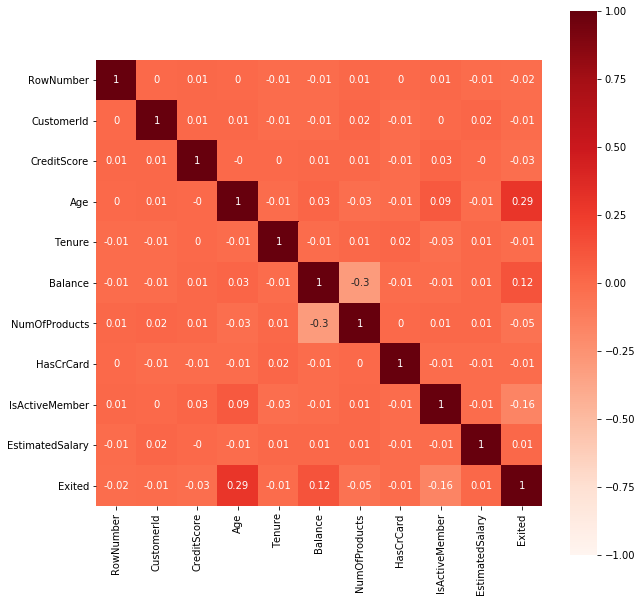

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().round(2), annot=True, vmax=1, vmin = -1, square=True, cmap='Reds');

# Analysis
- There is no correlation.

## Exited => Age average and Balance Average

In [20]:
(pd.crosstab(index = data['Exited'], columns = [data['Age'].mean(), data['Balance'].mean()])* 100).round(2)

col_0,38.9218
col_1,76485.889288
Exited,
0,796300
1,203700


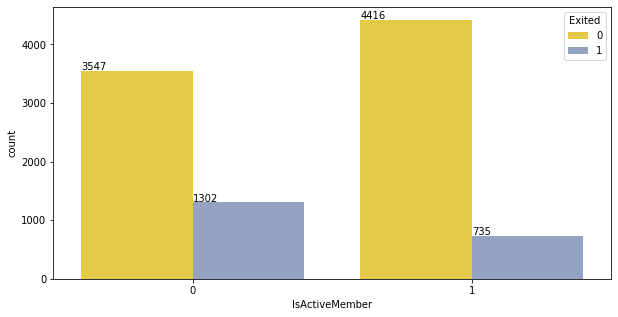

In [21]:
plt.figure(figsize=(10,5))
a= sns.countplot('IsActiveMember',hue='Exited',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

In [22]:
(pd.crosstab(index = data['Exited'], columns = [data['IsActiveMember'], data['NumOfProducts']])* 100).round(2)

IsActiveMember       0                            1                    
NumOfProducts        1       2      3     4       1       2     3     4
Exited                                                                 
0               159700  193200   1800     0  207800  231000  2800     0
1                92400   21200  13500  3100   48500   13600  8500  2900

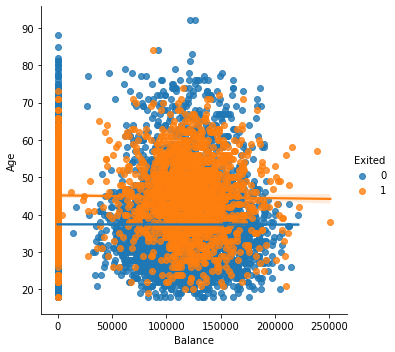

In [23]:
sns.lmplot(x = 'Balance', y = 'Age', data= data, hue='Exited')

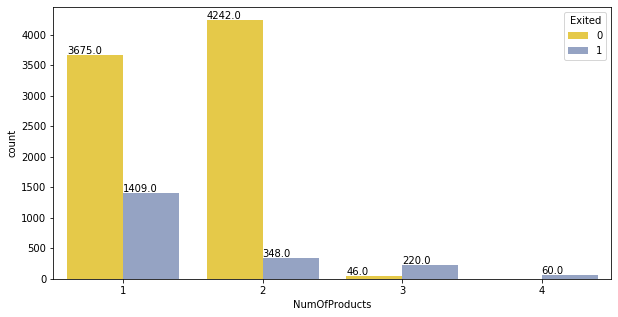

In [24]:
plt.figure(figsize=(10,5))
a= sns.countplot('NumOfProducts',hue='Exited',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

## Analysis

By selling additional products to customers we associate with them, thus increasing their loyalty (we have seen that more loyal customers are
those who use at least two bank products). 


-- Source :
    Zoric, Alisa. (2016). Predicting Customer Churn in Banking Industry using Neural Networks. Interdisciplinary Description of Complex Systems. 14. 116-124. 10.7906/indecs.14.2.1. 

In [25]:
num_var = data._get_numeric_data().columns
cat_var= list(set(data.columns) - set(num_var))
print(num_var)
print(cat_var)

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
['Gender', 'Surname', 'Geography']


## Tenure => Exited

Tenure : masa pemilikan product perbankan

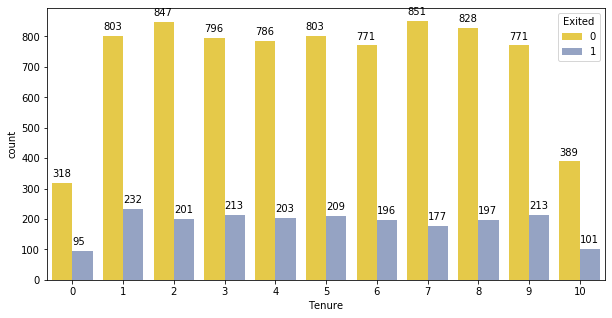

In [26]:
plt.figure(figsize=(10,5))
a= sns.countplot('Tenure',hue='Exited',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

## Analysis :

- Clients who have longer tenure and deeper banking relationships with the target bank are less likely to churn

-- Source :
Shirazi, F., & Mohammadi, M. (2018). A big data analytics model for customer churn prediction in the retiree segment. International Journal of Information Management.

# Conclusion

- Investigated the effect of gender as a customer demographic variable. The result shows as the same as research from Buckinx and Van den Poel (2005) and Clemes et al. (2010) who listed customer-related demographic variables (e.g., income, age, education, culture, and nationality).
- By selling additional products to customers we associate with them, thus increasing their loyalty (we have seen that more loyal customers are those who use at least two bank products).
- Clients who have longer tenure and deeper banking relationships with the target bank are less likely to churn. Shirazi, F., & Mohammadi, M. (2018)

# Recommendation

1. Banks can improve their marketing by focusing their efforts to persuade clients to stay in bank on certain demographic clients particularly female clients, Germany and France nationality.
2. The importance to supply the whole range of financial products so that a customer can fulfill all his financial needs within one and the same service provider. Moreover, customers and intermediaries can build valuable relationships through products and services that both satisfy customer needs and strengthen the company’s future market position.